### Step 1: creation of data

create dataset 3th order polynomial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data_points = 150
n = int(data_points/2)

#generate n1
nRange = 5
n1 = np.random.uniform(-nRange, nRange,n)
b0 = 1
b1 = 3
b2 = 4
b3 = 2
noiseLevel = 5
noise = np.random.normal(-noiseLevel,noiseLevel,n)
n1_y = b0 + (b1 * n1) + (b2 * (n1**2)) + (b3 * (n1**3)) + noise 

#generate n2
n2 = np.random.uniform(-nRange, nRange,n)
b0 = 1.2
b1 = 3.6
b2 = 3.2
b3 = 2.9
noiseLevel = 5
noise = np.random.normal(-noiseLevel,noiseLevel,n)
n2_y = b0 + (b1 * n2) + (b2 * (n2**2))+ (b3 * (n2**3))  + noise 

In [2]:
#concanate data
X = np.concatenate((n1,n2),axis=0)
y = np.concatenate((n1_y,n2_y),axis=0)

#X = X.reshape(len(X), 1)
#y = y.reshape(len(y), 1)
print(X.shape)
print(y.shape)

(150,)
(150,)


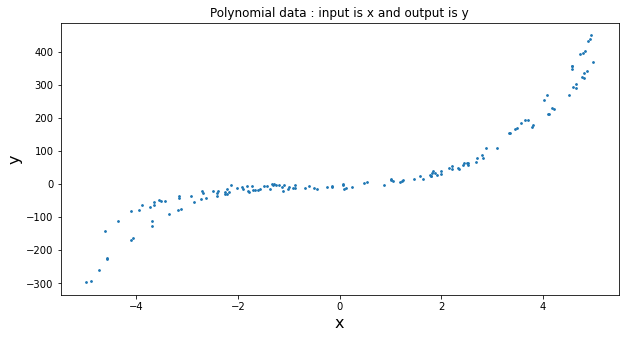

In [3]:
plt.figure(figsize =(10,5))
plt.scatter(X,y,s=3)
plt.title('Polynomial data : input is x and output is y')
plt.xlabel('x',fontsize =16)
plt.ylabel('y',fontsize=16)
plt.show()

train test data split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100,)
(50,)
(100,)
(50,)


### Step 2: Model selection - finding best M
#### using scikit-learn

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

test_error = []
train_error = []

m_range = range(1,16,1)

for m in m_range:
    poly = PolynomialFeatures(degree = m)
    
    #map train data
    x_input_train = X_train[:,np.newaxis]
    x_mapped_train = poly.fit_transform(x_input_train)
    
    #fit data
    regressor = LinearRegression()
    regressor.fit(x_mapped_train,y_train)
    
    #predict training value
    y_hat_train = regressor.predict(x_mapped_train)
    mse_train = metrics.mean_squared_error(y_train,y_hat_train)
    #mse_train = np.square(np.subtract(y_train,y_hat_train)).mean() 
    train_error.append(mse_train)
    
    #mapping testing value and predict testing value
    x_input_test = X_test[:,np.newaxis]
    x_mapped_test = poly.fit_transform(x_input_test)
    y_hat_test = regressor.predict(x_mapped_test)
    mse_test  = metrics.mean_squared_error(y_test,y_hat_test)
    test_error.append(mse_test)

train and test error as a plot

Polynomial Train Test Error with respect to m


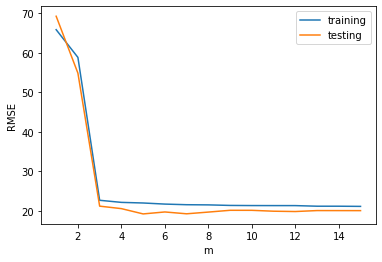

In [6]:
print("Polynomial Train Test Error with respect to m")

plt.plot(m_range,np.sqrt(train_error),label = "training")
plt.plot(m_range,np.sqrt(test_error),label = "testing")
plt.xlabel("m")
plt.ylabel("RMSE")
plt.legend()
plt.show()

chose best m with lowest test error

In [7]:
best_test = np.min(test_error)
best_test_m = test_error.index(best_test)+1
print("M:",best_test_m)
print("Min test error",best_test)
print("Train error",train_error[best_test_m-1])

M: 5
Min test error 370.8365925287225
Train error 484.8851629263993


In [8]:
train_error

[4336.798623975106,
 3462.8379709151877,
 515.5139614893519,
 491.7651587133469,
 484.8851629263993,
 472.7664017040626,
 465.8755071485539,
 464.0531644701218,
 458.1019424902406,
 456.71964308698097,
 456.2979669790028,
 456.19894435316417,
 449.7515516361039,
 449.6662341737614,
 447.867916968692]

In [9]:
test_error

[4796.370781233996,
 3009.750510639698,
 450.39153420836044,
 424.1473627413868,
 370.8365925287225,
 390.102614018042,
 372.00456303548475,
 388.9349331567599,
 406.9154119723547,
 406.63730006894235,
 397.66811771506383,
 394.47185647755475,
 404.12592417024956,
 403.7866851685347,
 403.4763395342369]

In [10]:
poly = PolynomialFeatures(degree = best_test_m)
x_input_train = X_train[:,np.newaxis]
x_mapped_train = poly.fit_transform(x_input_train)
    
regressor = LinearRegression()
regressor.fit(x_mapped_train,y_train)
    
#mapping testing value and predict testing value
x_input_test = X_test[:,np.newaxis]
x_mapped_test = poly.fit_transform(x_input_test)
y_hat_test = regressor.predict(x_mapped_test)

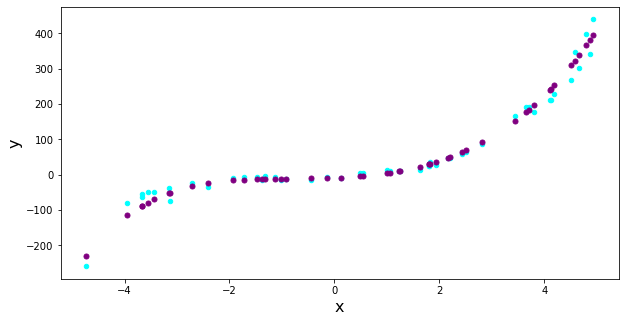

In [11]:
plt.figure(figsize =(10,5))
plt.scatter(X_test,y_test,s=20,color='cyan')
plt.scatter(X_test,y_hat_test,s=25,color='purple')
plt.xlabel('x',fontsize =16)
plt.ylabel('y',fontsize=16)

plt.show()

### Step 3: Pipeline

In [12]:
from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ("poly" , PolynomialFeatures(degree = best_test_m)),
    ("lin_reg", LinearRegression())
])

x_input = X_train[:,np.newaxis]
x_test = X_test[:,np.newaxis]
poly_regression.fit(x_input,y_train)
y_hat = poly_regression.predict(x_test)

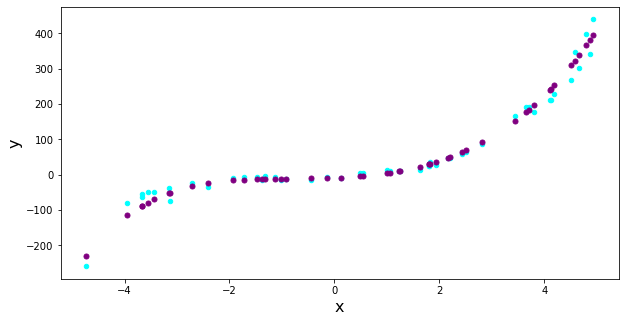

In [13]:
plt.figure(figsize =(10,5))
plt.scatter(X_test,y_test,s=20,color='cyan')
plt.scatter(X_test,y_hat,s=25,color='purple')
plt.xlabel('x',fontsize =16)
plt.ylabel('y',fontsize=16)

plt.show()

### Step 4: Create learning curves

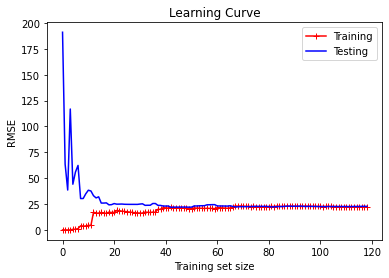

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=20)
test_errors = []
train_errors = []
for m in range(1,len(X_train)):
    poly_regression = Pipeline([
    ("poly" , PolynomialFeatures(degree = 3)),
    ("lin_reg", LinearRegression())
    ])

    x_input = X_train[:,np.newaxis]
    x_test = X_test[:,np.newaxis]

    
    poly_regression.fit(x_input[:m], y_train[:m])
    
    y_hat_train = poly_regression.predict(x_input[:m])
    mse_train  = metrics.mean_squared_error(y_train[:m],y_hat_train)
    train_errors.append(mse_train)
    
    y_hat_test = poly_regression.predict(x_test)
    mse_test  = metrics.mean_squared_error(y_test,y_hat_test)
    test_errors.append(mse_test)
    
plt.plot(np.sqrt(train_errors),"r-+",label="Training")
plt.plot(np.sqrt(test_errors),"b-",label="Testing")
plt.title("Learning Curve")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.show() 

increasing test size -> descreasing train size

(135, 1)
(120, 1)
(105, 1)
(90, 1)
(75, 1)
(60, 1)
(45, 1)
(30, 1)
(15, 1)


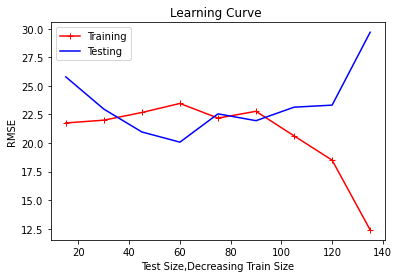

In [15]:
test_errors = []
train_errors = []
m_range = range(0,9,1)
size = np.array([0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

for i in m_range:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = size[i],random_state=20)
    poly_regression = Pipeline([
    ("poly" , PolynomialFeatures(degree = 3)),
    ("lin_reg", LinearRegression())
    ])

    x_input = X_train[:,np.newaxis]
    x_test = X_test[:,np.newaxis]
    poly_regression.fit(x_input,y_train)
    print(x_input.shape)
    y_hat_test = poly_regression.predict(x_test)
    mse_test  = metrics.mean_squared_error(y_test,y_hat_test)
    test_errors.append(mse_test)
    
    y_hat_train = poly_regression.predict(x_input)
    mse_train  = metrics.mean_squared_error(y_train,y_hat_train)
    train_errors.append(mse_train)
plt.plot(size*data_points,np.sqrt(train_errors),"r-+",label="Training")
plt.plot(size*data_points,np.sqrt(test_errors),"b-",label="Testing")
plt.title("Learning Curve ")
plt.xlabel("Test Size,Decreasing Train Size")
plt.ylabel("RMSE")
plt.legend()
plt.show()
